In [5]:
import matplotlib.pyplot as plot
import numpy as np
%matplotlib inline

# Pillow 简介

PIL：Python Imaging Library，已经是Python平台事实上的图像处理标准库了。PIL功能非常强大，但API却非常简单易用。

由于PIL仅支持到Python 2.7，加上年久失修，于是一群志愿者在PIL的基础上创建了兼容的版本，名字叫 [Pillow](https://github.com/python-pillow/Pillow)，支持最新Python 3.x，又加入了许多新特性，因此，我们可以直接安装使用Pillow。

## 安装Pillow

```shell
$ pip install pillow
```

## 操作图像

最常见的图像缩放操作，只需三四行代码

Original image size: 512x512
Resize image to: 256x256


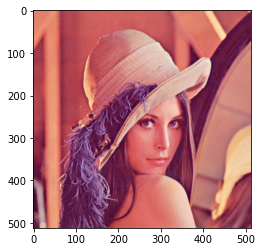

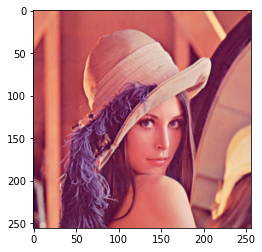

In [8]:
from PIL import Image

# 打开一个jpg图像文件，注意是当前路径:
im = Image.open('img/Lenna.png')
plot.figure()
plot.imshow(np.asarray(im))
# 获得图像尺寸:
w, h = im.size
print('Original image size: %sx%s' % (w, h))
# 缩放到50%:
im.thumbnail((w//2, h//2))
print('Resize image to: %sx%s' % (w//2, h//2))
# 把缩放后的图像用jpeg格式保存:
im.save('thumbnail.png', 'jpeg')
plot.figure()
plot.imshow(np.asarray(im))

其他功能如切片、旋转、滤镜、输出文字、调色板等一应俱全。
比如，模糊效果也只需几行代码：

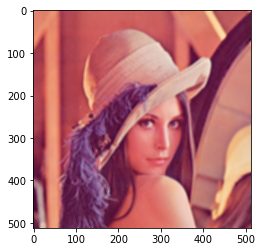

In [11]:
from PIL import Image, ImageFilter

# 打开一个jpg图像文件，注意是当前路径:
im = Image.open('img/Lenna.png')
# 应用模糊滤镜:
im2 = im.filter(ImageFilter.BLUR)
plot.imshow(np.asarray(im2))

PIL 的 `ImageDraw` 提供了一系列绘图方法，让我们可以直接绘图。比如要生成字母验证码图片:

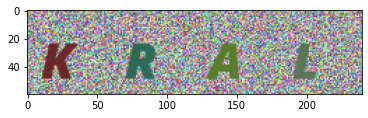

In [19]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter

import random

# 随机字母:
def rndChar():
    return chr(random.randint(65, 90))

# 随机颜色1:
def rndColor():
    return (random.randint(64, 255), random.randint(64, 255), random.randint(64, 255))

# 随机颜色2:
def rndColor2():
    return (random.randint(32, 127), random.randint(32, 127), random.randint(32, 127))

# 240 x 60:
width = 60 * 4
height = 60
image = Image.new('RGB', (width, height), (255, 255, 255))
# 创建Font对象:
font = ImageFont.truetype('img/NotoSans-BlackItalic.ttf', 36)
# 创建Draw对象:
draw = ImageDraw.Draw(image)
# 填充每个像素:
for x in range(width):
    for y in range(height):
        draw.point((x, y), fill=rndColor())
# 输出文字:
for t in range(4):
    draw.text((60 * t + 10, 10), rndChar(), font=font, fill=rndColor2())
# 模糊:
image = image.filter(ImageFilter.BLUR)
plot.imshow(np.asarray(image))

要详细了解PIL的强大功能，请请参考Pillow官方文档：

[https://pillow.readthedocs.org/](https://pillow.readthedocs.org/)